# Partie 1.2 -- Étude numérique de deux méthodes de descente de gradient

$$\newcommand{\eps}{\varepsilon}$$
Dans la suite, on fixe une fois pour toute $a=(0,1)$, $b = (0,-1)$, $c = (0.1,0)$, $\eps = 10^{-3}$. 

**QN1.** Écrire quatre fonctions n(x), gradn(x), f(x), gradf(x) calculant respectivement $n_\eps(x),\nabla n_\eps(x),f_\eps(x),\nabla f_\eps(x)$.

In [1]:
# on importe les modules numpy et pyplot
import numpy as np
import matplotlib.pyplot as plt
# les deux commandes suivante paramètrent l'affichage des figures
%matplotlib inline
plt.rcParams['figure.figsize'] = [9.,6.]

a = [0.,1.]
b = [0.,-1.]
c = [.1,0.]
eps = 1e-3

def n(x):
    return np.sqrt(eps+x[0]**2+x[1]**2)
def gradn(x):
    return x/n(x)

def f(x):
    return n(x-a) + n(x-b) + n(x-c)

def gradf(x):
    return gradn(x-a) + gradn(x-b) + gradn(x-c)

**QN2**. Écrire une fonction gradient_fixe(f,gradf,x0,tau) implémentant l'algorithme de descente de gradient à pas fixe: 

$$\begin{cases}
x^{(0)} \in \mathbb{R}^2 \hbox{ donné }\\
x^{(k+1)} = x^{(k)} - \tau \nabla f(x^{(k)})
\end{cases}$$

- on s'arrêtera quand $k=100$ ou dès que $\|{\nabla f(x^{(k)})}\| \leq 10^{-6}$
- la fonction retournera un tableau $G = [\|\nabla f(x^{(0)})\|,\dots, \|\nabla f(x^{(k)})\|]$

In [2]:
def gradient_fixe(f, gradf, x0, tau, err=1e-6):
    G = []
    x = x0.copy()
    for i in range(100):
        g = gradf(x)
        n = np.linalg.norm(g)
        G.append(n)
        if n <= err:
            break
        x = x - tau*g
    return G

**QN4** Écrire une fonction gradient_backtracking(f,gradf,x0,tau) implémentant l'algorithme de descente de gradient avec backtracking d'Armijo: 

$$\begin{cases}
x^{(0)} \in \mathbb{R}^2 \hbox{ donné }\\
g^{(k)} = \nabla f(x^{(k)}) \\
d^{(k)} = - g^{(k)} \\
\tau^{(k)} = backtrack(f,x^{(k)},d^{(k)}, g^{(k)}) \\
x^{(k+1)} = x^{(k)} + \tau^{(k)} d^{(k)}
\end{cases}$$

La fonction backtrack est donnée. La fonction gradient_backtracking aura le même comportement que gradient_fixe:

- on fera au plus $100$ itérations, et on s'arrêtera dès que $\|{\nabla f(x^{(k)})}\| \leq 10^{-6}$
- la fonction retournera un tableau $G = [\|\nabla f(x^{(0)})\|,\dots, \|\nabla f(x^{(k)})\|]$ 

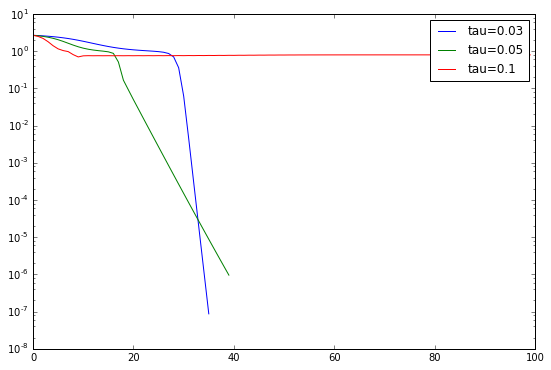

In [3]:
G = gradient_fixe(f,gradf,np.array([1.,1.]),0.03)
plt.semilogy(G,label='tau=0.03')
G = gradient_fixe(f,gradf,np.array([1.,1.]),0.05)
plt.semilogy(G, label='tau=0.05')
G = gradient_fixe(f,gradf,np.array([1.,1.]),0.1)
plt.semilogy(G, label='tau=0.1')
plt.legend()

**Q4** Écrire une fonction gradient_backtracking(f,gradf,x0,tau) implémentant l'algorithme de descente de gradient avec backtracking d'Armijo: 

$$\begin{cases}
x^{(0)} \in \mathbb{R}^2 \hbox{ donné }\\
g^{(k)} = \nabla f(x^{(k)}) \\
d^{(k)} = - g^{(k)} \\
\tau^{(k)} = backtrack(f,x^{(k)},d^{(k)}, g^{(k)})
x^{(k+1)} = x^{(k)} - \tau 
\end{cases}$$

La fonction backtrack est donnée. La fonction gradient_backtracking aura le même comportement que gradient_fixe:

- on fera au plus $100$ itérations, et on s'arrêtera dès que $\|{\nabla f(x^{(k)})}\| \leq 10^{-6}$
- la fonction retournera un tableau $G = [\|\nabla f(x^{(0)})\|,\dots, \|\nabla f(x^{(k)})\|]$

In [4]:
def backtrack(f,x,d,g):
    t = 1
    m = np.dot(d,g)
    while f(x+t*d) > f(x) + 0.3*t*m:
        t = 0.5*t
    return t

def gradient_backtracking(f,gradf,x0,err=1e-6):
    x = x0.copy()
    G = []
    for i in range(100):
        g = gradf(x)
        d = -g
        n = np.linalg.norm(d)
        G.append(n)
        if n <= err:
            break
        t = backtrack(f,x,d,g)
        x = x + t*d
    return np.array(G)

**QN5** Tester la fonction gradient_backtracking en partant des points $x^{(0)} \in \{ (0,0), (1,1), (10,10) \}$. Tracer l'évolution de la norme du gradient au cours des itérations dans ces trois cas. Commenter.

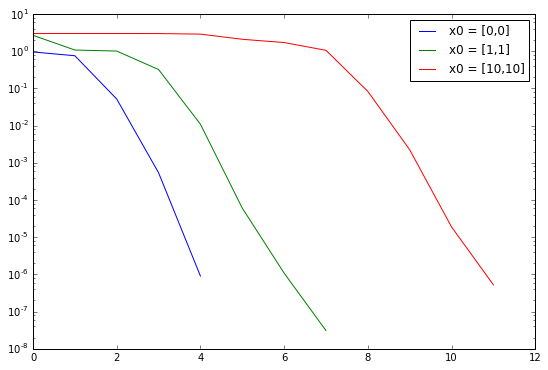

In [5]:
x0 = np.array([0.,0.])
G = gradient_backtracking(f,gradf,x0,1e-6)
plt.semilogy(G,label='x0 = [0,0]')

x0 = np.array([1.,1.])
G = gradient_backtracking(f,gradf,x0,1e-6)
plt.semilogy(G,label='x0 = [1,1]')

x0 = np.array([10.,10.])
G = gradient_backtracking(f,gradf,x0,1e-6)
plt.semilogy(G,label='x0 = [10,10]')

plt.legend()